In [43]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import statsmodels.api as sm
import networkx as nx
import math

$Y_i = a+b*X_i+e_i$

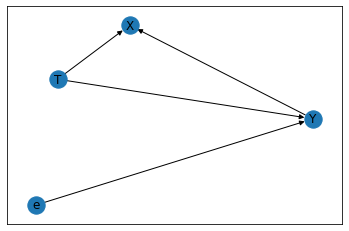

In [44]:
graph = nx.DiGraph()
graph.add_edges_from([("T", "Y"), ("e", "Y"), ("T", "X"), ("Y", "X")])
plt.tight_layout()
nx.draw_networkx(graph, arrows=True)
plt.savefig("g1.png", format="PNG")

No Control for Var in Path

The RSME is 3.4087824080637814 . The bias is 3.4087824080637814 . The treatment effect is 1.1659121759193622


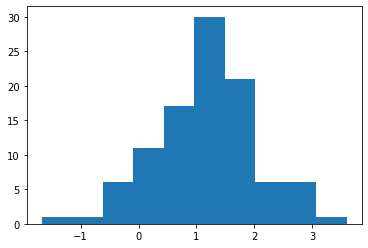

In [52]:
a = .5
b = 1.2
c = 2
n = 100
slopes = []
sum_of_bias=0
for mc in range(100):
    T = np.random.normal(0,1,n)
    e = np.random.normal(0,10,n)
    Y = a+b*T + e
    # X is correlated both with treatment and outcome Y
    X = .3 + .3 * T + .4 * Y
    # not controlling for X in this regression
    model = sm.OLS(Y,sm.add_constant(T))
    residuals = model.fit()
    slopes = slopes + [residuals.params[1]]
    bias  = b - residuals.params[1]
    sum_of_bias= sum_of_bias+bias
np.mean(slopes)
plt.hist(slopes)
meanbias= np.mean(sum_of_bias)
rsme =  np.sqrt(np.mean(sum_of_bias**2))
treatment_effect = sum(slopes) / len(slopes)
print("The RSME is", rsme,". The bias is", meanbias,". The treatment effect is", treatment_effect)

The RSME is 3.1858054620808605 . The bias is 3.1858054620808605 . The treatment effect is 1.19681419453792
The RSME is 3.1858054620808605 . The bias is 3.1858054620808605 . The treatment effect is 1.19681419453792


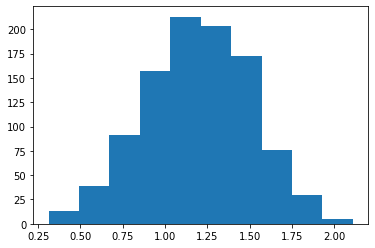

In [53]:
a = .5
b = 1.2
c = 2
n = 1000
slopes = []
sum_of_bias=0
for mc in range(1000):
    T = np.random.normal(0,1,n)
    e = np.random.normal(0,10,n)
    Y = a+b*T + e
    # X is correlated both with treatment and outcome Y
    X = .3 + .3 * T + .4 * Y
    # not controlling for X in this regression
    model = sm.OLS(Y,sm.add_constant(T))
    residuals = model.fit()
    slopes = slopes + [residuals.params[1]]
    bias  = b - residuals.params[1]
    sum_of_bias= sum_of_bias+bias
np.mean(slopes)
plt.hist(slopes)
meanbias= np.mean(sum_of_bias)
rsme =  np.sqrt(np.mean(sum_of_bias**2))
treatment_effect = sum(slopes) / len(slopes)
print("The RSME is", rsme,". The bias is", meanbias,". The treatment effect is", treatment_effect)

Control for Var in path

/Users/polly/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


The RSME is 194.99999999999977 . The bias is 194.99999999999977 . The treatment effect is -0.7499999999999999


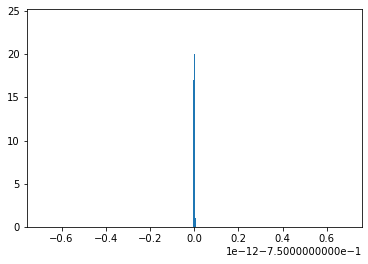

In [54]:
a = .5
b = 1.2
c = 2
n = 100
slopes = []
sum_of_bias=0
for mc in range(100):
    T = np.random.normal(0,1,n)
    e = np.random.normal(0,10,n)
    Y = a+b*T + e
    X = .3 + .3 * T + .4 * Y
    # now we are controlling for X by adding it as a covariate. should bias effects
    data = pd.DataFrame({'T':T, 'X':X})
    model = sm.OLS(Y,sm.add_constant(data))
    residuals = model.fit()
    slopes = slopes + [residuals.params[1]]
    bias  = b - residuals.params[1]
    sum_of_bias= sum_of_bias+bias
np.mean(slopes)
plt.hist(slopes)
meanbias= np.mean(sum_of_bias)
rsme =  np.sqrt(np.mean(sum_of_bias**2))
treatment_effect = sum(slopes) / len(slopes)
print("The RSME is", rsme,". The bias is", meanbias,". The treatment effect is", treatment_effect)

The RSME is 194.9999999999998 . The bias is 194.9999999999998 . The treatment effect is -0.7500000000000001


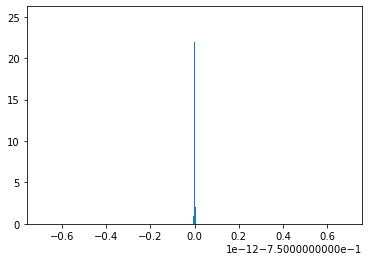

In [56]:
a = .5
b = 1.2
c = 2
n = 100
slopes = []
sum_of_bias=0
for mc in range(100):
    T = np.random.normal(0,1,n)
    e = np.random.normal(0,10,n)
    Y = a+b*T + e
    X = .3 + .3 * T + .4 * Y
    # now we are controlling for X by adding it as a covariate. should bias effects
    data = pd.DataFrame({'T':T, 'X':X})
    model = sm.OLS(Y,sm.add_constant(data))
    residuals = model.fit()
    slopes = slopes + [residuals.params[1]]
    bias  = b - residuals.params[1]
    sum_of_bias= sum_of_bias+bias
np.mean(slopes)
plt.hist(slopes)
meanbias= np.mean(sum_of_bias)
rsme =  np.sqrt(np.mean(sum_of_bias**2))
treatment_effect = sum(slopes) / len(slopes)
print("The RSME is", rsme,". The bias is", meanbias,". The treatment effect is", treatment_effect)

REAL LIFE EXAMPLE

Selection bias is when you control for too many variables, including variables that may be a consequence of the treatment and outcome. So, in an example where you are trying to determine the effect of education on wage, say you control for investment. However, it is likely that people with more education are more likely to invest and that people who earn more are more likely to invest. Thus, y effects investment and T effects invesment. So, you introduce bias to your causal effect.